In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import utils

In [2]:
data = np.loadtxt(os.path.join('ex2data1.txt'),delimiter=',')

In [3]:
data.shape

(100, 3)

In [4]:
X = data[:,0:2]
y = data[:,2]

m = len(X)
n = X.shape[1]

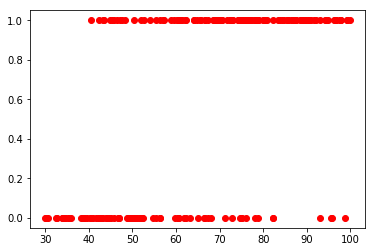

In [5]:
pyplot.plot(X,y,'ro')

### 0. First display data to see if we can use linear fit or not

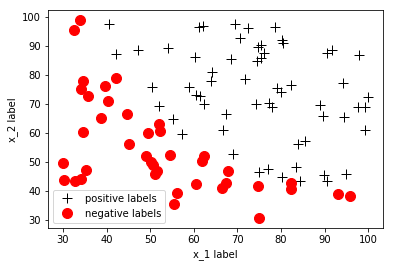

In [7]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================

    
    # ============================================================
    pos_1 = X[:,0][y == 1]
    pos_2 = X[:,1][y == 1]
    neg_1 = X[:,0][y == 0]
    neg_2 = X[:,1][y == 0]
    pyplot.plot(pos_1,pos_2,'k+' ,ms = 10,  label = 'positive labels')
    pyplot.plot(neg_1,neg_2,'ro', ms = 10, label = 'negative labels')
    pyplot.xlabel('x_1 label')
    pyplot.ylabel('x_2 label')
    pyplot.legend(numpoints=1)
    
plotData(X,y)

# Logistic regression: optimize via GD

## 1. define: sigmoid function

In [8]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """


    # ====================== YOUR CODE HERE ======================

    

    # =============================================================
    return (1 / (1 + np.exp(-z)))

In [9]:

# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

('g(', 0, ') = ', 0.5)


## 2. define cost function

### 2.1. first reshape the training data and add zero feature of value 1

In [10]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [11]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = X.shape[0]  # number of training examples
    z = np.dot(X,theta)
    h = sigmoid(z)
    

    # You need to return the following variables correctly 

    # ====================== YOUR CODE HERE ======================
    
    J = (-1 / m) * ( np.dot(((np.log(h)).T),y) + (np.dot((np.log(1-h)).T, (1-y))))
     

    # =============================================================
    return J

In [12]:

# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost  = costFunction(initial_theta, X, y)
cost

69.31471805599452

## 3. define optimize by gradient descent

In [13]:
def optimize_gradient(X, y, theta,alpha, max_iter):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
        
    m = X.shape[0]

    J_history = np.zeros(max_iter)
    
    for i in range(max_iter):
        z = np.dot(X,theta)
        h = sigmoid(z)
        grad = (np.dot(X.T,(h-y))/m) # vectorized
        theta = theta - (alpha * grad)
        J_history[i] = costFunction(theta, X, y)
        
    
    # 0r
    #grad =  np.sum(X.T*(h-y),axis=1)/m
    
    return theta, J_history 

In [14]:
initial_theta = np.zeros(n+1)
alpha = 0.2
max_iter = 1000
theta,J = optimize_gradient(X, y, initial_theta,alpha, max_iter)
theta

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


array([-15.35831849,   6.95754355,  -2.58643877])

# Logistic regression: optimize via scipy

## 1. define cost function and gradient together

In [15]:
# costFunction: A cost function that, 
#when given the training set and a particular $\theta$, computes the logistic regression cost and gradient 


In [17]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size

    # ====================== YOUR CODE HERE ======================

    h = sigmoid(X.dot(theta))
    J = (-1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    grad = (X.T.dot(h-y))/m   
    
    # =============================================================
    
    return J, grad

In [18]:

# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)
print(cost)
print(grad)

69.31471805599452
[ -0.1        -12.00921659 -11.26284221]


In [19]:
# options: Additional options which might be specific to the specific optimization method. 
# I added only the maximum number of iterations before it terminates.
options = {'maxiter': 2000}

## 2. define the optimization 

In [22]:
def optimizeLR(X,y, options):
    res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
    return res

res = optimizeLR(X,y, options)
print(res)
theta_star = res.x
print('cost: ', res.fun )
print('theta: ', res.x)
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

     fun: 20.349770158947482
     jac: array([9.21309382e-09, 1.05785498e-07, 4.81812291e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131854,   0.20623159,   0.20147149])
('cost: ', 20.349770158947482)
('theta: ', array([-25.16131854,   0.20623159,   0.20147149]))
Expected theta (approx):
	[-25.161, 0.206, 0.201]


## 3. evaluate the logistic regression

In [23]:
def predict(theta_star, X, threshold = 0.5):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly

    # ====================== YOUR CODE HERE ======================

    p =  sigmoid(np.dot(X,theta_star)) >= threshold  # p is True False    

    
    # ============================================================
    return p.astype('int')   # recast the true false to integer

In [24]:

p = predict(res.x, X)
p

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [25]:
print('training accuracy: {:.2f}%'.format(np.mean(p==y)*100))

training accuracy: 89.00%


In [26]:
#utils.plotDecisionBoundary(plotData, theta, X, y)

# Regularized logistic regression

In [27]:

data2 = np.loadtxt(os.path.join('ex2data2.txt'), delimiter = ',')

In [28]:
data2.shape

(118, 3)

In [29]:
X = data2[:,0:2]
m = X.shape[0]
y = data2[:,2]
n = data2.shape[1]

### 0. display data to see if we can use a linear fit or not

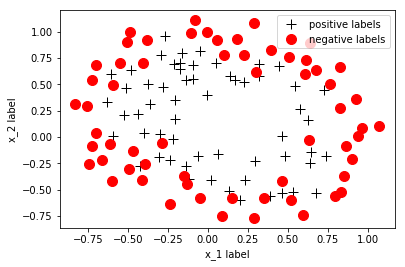

In [30]:
plotData(X,y)

In [31]:
# The above figure shows that our dataset cannot be separated into positive and negative examples
# by a straight-line through the plot.
# Therefore, a straight-forward application of logistic regression will not perform well on this dataset 
# since logistic regression will only be able to find a linear decision boundary.
# One way to fit the data better is to create more features from each data point

In [32]:
from sklearn.preprocessing import PolynomialFeatures
# Generate a new feature matrix consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree.
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape


(118, 28)

In [30]:
XX[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
#  regularization can help combat the overfitting problem.

### 1. Cost function and gradient

In [31]:
def costFunctionReg(theta, XX, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples
 

    # You need to return the following variables correctly 
    # theta_0 is not penalized


    # ====================== YOUR CODE HERE ======================

    h = sigmoid(XX.dot(theta))
    J = (-1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))+(lambda_/(2*m))*(np.sum(np.square(theta)))
    grad = (XX.T.dot(h-y))/m + (lambda_/m)*theta[:1]
    
    # =============================================================
    return J, grad

In [32]:

# Initialize fitting parameters
initial_theta = np.zeros(XX.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 12
J, grad = costFunctionReg(initial_theta, XX, y, lambda_)


In [33]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
#print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 54.2 %
